    
- 데이터 출처: https://www.kaggle.com/aljarah/xAPI-Edu-Data

The dataset consists of 480 student records and 16 features. The features are classified into three major categories: (1) Demographic features such as gender and nationality. (2) Academic background features such as educational stage, grade Level and section. (3) Behavioral features such as raised hand on class, opening resources, answering survey by parents, and school satisfaction.

위의 데이터는 연구용 데이터로 480명의 각기 다양한 나라의 학생을 모아서 17개의 features를 나타낸다. 17개의 features는 아래와 같다.

    gender: 학생의 성별 (M: 남성, F: 여성)
    NationaliTy: 학생의 국적
    PlaceofBirth: 학생이 태어난 국가
    StageID: 학생이 다니는 학교 (초,중,고)
    GradeID: 학생이 속한 성적 등급
    SectionID: 학생이 속한 반 이름
    Topic: 수강한 과목
    Semester: 수강한 학기 (1학기/2학기)
    Relation: 주 보호자와 학생의 관계
    raisedhands: 학생이 수업 중 손을 든 횟수
    VisITedResources: 학생이 코스에 나온 횟수 
    AnnouncementsView: 학생이 과목 공지를 확인한 횟수
    Discussion: 학생이 토론 그룹에 참여한 횟수
    ParentAnsweringSurvey: 부모가 학교 설문에 참여했는지 여부
    ParentschoolSatisfaction: 부모가 학교에 만족했는지 여부
    StudentAbscenceDays: 학생의 결석 횟수 (7회 이상/미만)
    Class: 학생의 성적 등급 (L: 낮음, M: 보통, H: 높음)
        
  



## 1.연구용 데이터의 목적


논문을 쓰기 위해서 만들어지는 데이터이다. 그래서 연구용 데이터는 일반적으로 잘 정리되어 있다. 

## 2. 데이터셋

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

###  Colab Notebook에 Kaggle API 세팅하기


In [ ]:
import os

In [ ]:

os.environ['KAGGLE_USERNAME']='yudaeun0918'
os.environ['KAGGLE_KEY']='3ebc0e802e33f64d11dce5442e93d2dc'



### 데이터 다운로드 및 압축 해제하기


In [ ]:

!kaggle datasets download -d aljarah/xAPI-Edu-Data
!unzip '*.zip'



  0% 0.00/5.54k [00:00<?, ?B/s]
100% 5.54k/5.54k [00:00<00:00, 4.46MB/s]
Archive:  xAPI-Edu-Data.zip
  inflating: xAPI-Edu-Data.csv       


### Pandas 라이브러리로 csv파일 읽어들이기


In [ ]:

df = pd.read_csv('xAPI-Edu-Data.csv')

## 3. EDA 및 데이터 기초 통계 분석


###  데이터프레임의 각 컬럼 분석하기


In [ ]:

df.head()


,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

연구용 데이터이기 때문에 비어있는 데이터 없이 꽉 차 있는 것을 확인할 수 있다.

In [ ]:
df.describe()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
count,480.000000,480.000000,480.000000,480.000000
mean,46.775000,54.797917,37.918750,43.283333
std,30.779223,33.080007,26.611244,27.637735
min,0.000000,0.000000,0.000000,1.000000
25%,15.750000,20.000000,14.000000,20.000000
50%,50.000000,65.000000,33.000000,39.000000
75%,75.000000,84.000000,58.000000,70.000000
max,100.000000,99.000000,98.000000,99.000000


int64의 데이터들의 통계값을 보면 상당히 uniform 하게 나타나 있는 것을 확인할 수 있다.

In [ ]:
df.columns

Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class'],
      dtype='object')

In [ ]:
df['gender'].value_counts()

M    305
F    175
Name: gender, dtype: int64

In [ ]:
df['NationalITy'].value_counts()

KW             179
Jordan         172
Palestine       28
Iraq            22
lebanon         17
Tunis           12
SaudiArabia     11
Egypt            9
Syria            7
USA              6
Iran             6
Lybia            6
Morocco          4
venzuela         1
Name: NationalITy, dtype: int64

### 수치형 데이터의 히스토그램 그리기


In [ ]:


df.columns



Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class'],
      dtype='object')

### Countplot을 이용하여 범주별 통계 확인하기


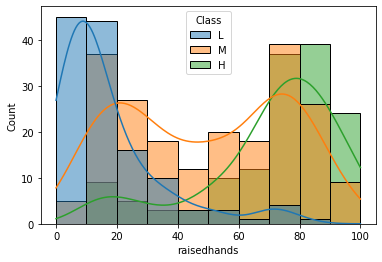

In [ ]:


sns.histplot(x='raisedhands', data=df,hue='Class', hue_order=['L','M','H'],kde=True)



High에 속하는 학생일수록 raisedhands(손을 든 횟수)가 높다는 것을 확인할 수 있다. 결국 공부를 잘하는 학생일수록 질문을 많이 한다는 소리.

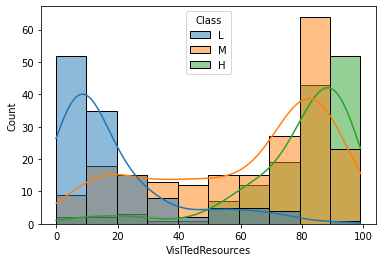

In [ ]:
sns.histplot(x='VisITedResources',data=df, hue='Class' , hue_order=['L','M','H'],kde=True)

VisITedResources= 학생이 코스에 나온 횟수

손을 든 횟수와 비슷하지만 middle에 속한 학생들이 과목공지는 많이 확인한 쪽에 몰려있다는 것을 확인할 수 있다. 그러므로 middle에 속한 학생들이 수업시간 참여보다 수업외적으로 참여하는 학생이 많다. 신기한듯...

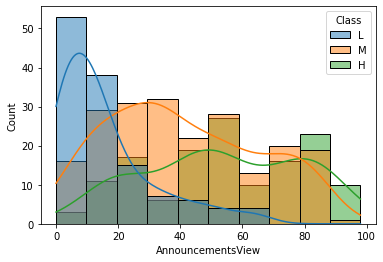

In [ ]:
sns.histplot(x='AnnouncementsView',data=df,hue='Class',hue_order=['L','M','H'],kde=True)

AnnouncementsView=과목 공지를 확인한 횟수

여기서도 성적이 나쁜 학생들이 과목공지를 잘 확인하지 않는다는 것을 확인할 수 있다. middle과 high인 학생들은 공지를 확인한 횟수와 성적과는 크게 연관성이 없어 보인다. 그래도 관심이 있는 학생들은 성적이 낮진 않다는 걸 확인할 수 있다. 공부 잘하려면 수강과목에 관심 가지기... 어찌보면 당연한 말이긴 한데 내가 수업할 때도 공지 안 보는 애들이 레포트도 못 풀더라 왜 관심이 없을까 

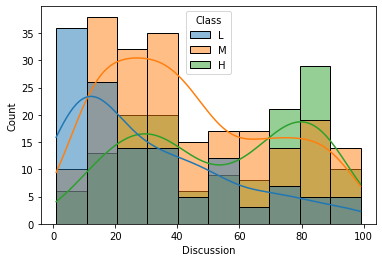

In [ ]:
sns.histplot(x='Discussion',data=df,hue='Class',hue_order=['L','M','H'],kde=True)

이거는 보니까 여기서도 성적이 나쁘면 토론에 거의 참여 안 하는데, 성적이 높은 애들도 토론에 많이 참여 안 하는 애들이 있다. 거의 쌍봉으로 나타났다. middle인 학생들은  토론에 참여 안 하는 학생이 더 많다는 것을 확인할 수 있다. 그래서 좀 데이터가 flat하게 나타났다.

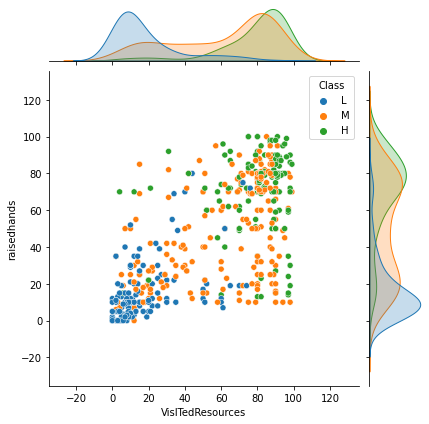

In [ ]:
sns.jointplot(x='VisITedResources',y='raisedhands',data=df,hue='Class',hue_order=['L','M','H'])

성적이 높을수록 손을 든 횟수와 수업에 나온 횟수가 높다는 것을 확인할 수 있는데... 손은 많이 들었는데 수업에 거의 안 나온 학생이 한 두명 있다. 역시 어딜가나 천재는 존재한다. 

* correlation은 낮을수록 좋다. 

### Countplot 이용해서 범주별 통계확인

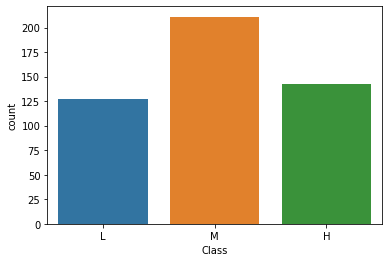

In [ ]:
sns.countplot(x='Class',data=df,order=['L','M','H'])

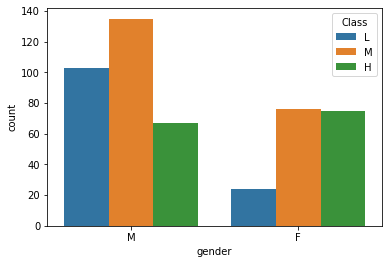

In [ ]:
sns.countplot(x='gender',data=df,hue='Class',hue_order=['L','M','H'])

조사했을 때 여학생의 수가 적어서 count가 적게 나왔지만 비율로 따지면 여학생들이 월등하게 성적이 높다는 것을 알 수 있다. 

In [ ]:
df.columns

Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class'],
      dtype='object')

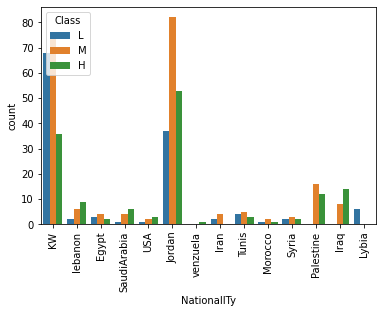

In [ ]:
sns.countplot(x='NationalITy',data=df,hue='Class',hue_order=['L','M','H'])
plt.xticks(rotation=90)
plt.show()

조르단, 이라크, 팔레스타인?, 사우디아라비아, 레바논, 미국 학생들이 공부를 잘하는 학생이 많은 것을 알 수 있다.

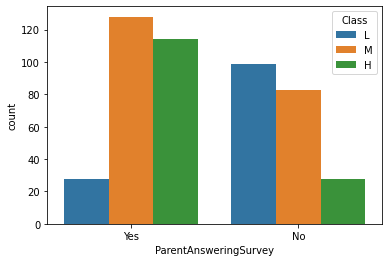

In [ ]:
sns.countplot(x='ParentAnsweringSurvey',data=df,hue='Class',hue_order=['L','M','H'])

부모님이 설문에 응한 경우가 많을 수록 성적이 월등히 높다. 성적에는 부모님의 적극성?도 많이 반영되는 것을 알 수 있다. 솔직히 개천에서 용난다는 말은 진짜 소수 중에서도 소수의 경우인 듯.

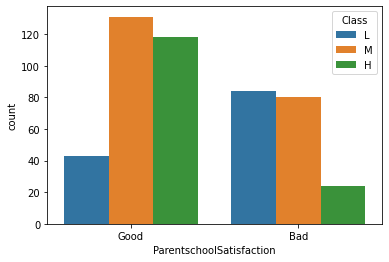

In [ ]:
sns.countplot(x='ParentschoolSatisfaction',data=df,hue='Class',hue_order=['L','M','H'])

이것도 위에랑 비슷하게 나왔다. 근데 이거는 자식의 성적이 좋게 나왔으니까 학교에 만족을 하는 거 아닐까?

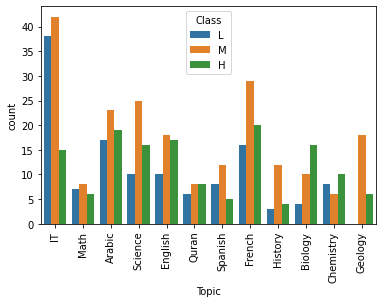

In [ ]:
sns.countplot(x='Topic',data=df,hue='Class',hue_order=['L','M','H'])
plt.xticks(rotation=90)
plt.show()

너무 웃긴다

IT를 선택한 애들이 성적이 월등하게 낮다ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ 공대오지 마세요.


### 범주형 대상 Class 컬럼을 수치로 바꾸어 표현하기

In [ ]:


df['Class_value'] = df['Class'].map(dict(L=-1,M=0,H=1))

df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class,Class_value
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M,0
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M,0
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L,-1
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L,-1
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M,0


<BarContainer object of 2 artists>

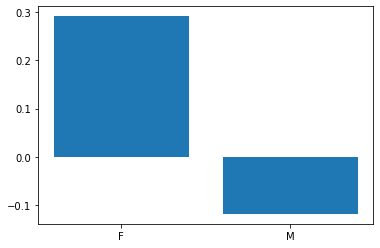

In [ ]:
gb_gender=df.groupby('gender').mean()['Class_value']
gb_gender
plt.bar(gb_gender.index,gb_gender)


<BarContainer object of 12 artists>

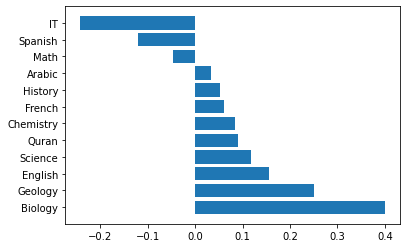

In [ ]:
gb=df.groupby('Topic').mean()['Class_value'].sort_values(ascending=False)
plt.barh(gb.index,gb)

<BarContainer object of 2 artists>

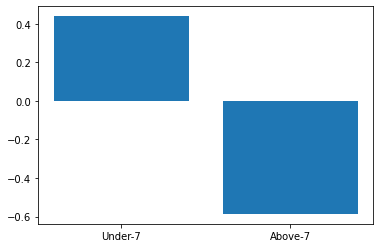

In [ ]:
gb=df.groupby('StudentAbsenceDays').mean()['Class_value'].sort_values(ascending=False)
plt.bar(gb.index,gb)

남학생보다 여학생의 성적이 훨씬 좋고 출석 일수가 7일보다 많아지면 성적이 굉장히 나쁘다. 본인이 천재가 아닌이상 성실하게 학교 나오는게 가장 성적 잘 받기 좋은 것 같다.

## 4. 모델 학습을 위한 데이터 전처리


###  get_dummies()를 이용하여 범주형 데이터 전처리하기


In [ ]:
df.columns

Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class', 'Class_value'],
      dtype='object')

In [ ]:
X = pd.get_dummies(df.drop(['ParentschoolSatisfaction','Class', 'Class_value'],axis=1),columns=['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 
       'ParentAnsweringSurvey', 
       'StudentAbsenceDays'],drop_first=True)
y = df['Class']



로지스틱 회귀를 이용하기 때문에 drop_first=True 로 해야 더 학습이 잘 된다. 그리고 부모의 학교 만족도는 왜 만족하는지 자녀가 잘하니까 만족하는게 아닌가 싶으니까 학습에서 빼도록 한다.

---

**공선성(collinearity)**: 하나의 독립변수가 다른 하나의 독립변수로 잘 예측되는 경우, 또는 서로 상관이 높은 경우

**다중공선성(multicollinearity)**: 하나의 독립변수가 다른 여러 개의 독립변수들로 잘 예측되는 경우

**(다중)공선성이 있으면** :

계수 추정이 잘 되지 않거나 불안정해져서 데이터가 약간만 바뀌어도 추정치가 크게 달라질 수 있다
계수가 통계적으로 유의미하지 않은 것처럼 나올 수 있다

---


* 전체 데이터에 대해서 pd.get_dummies를 적용시키면 기본적으로 
숫자형이 아닌 모든 컬럼들에 대해서 원핫인코딩(one-hot encoding) 진행한다.

* drop_first : 첫번째 카테고리 값은 사용하지 않음.

출처: https://hyeonnii.tistory.com/365 [From the bottom]



In [ ]:
X

,raisedhands,VisITedResources,AnnouncementsView,Discussion,gender_M,NationalITy_Iran,NationalITy_Iraq,NationalITy_Jordan,NationalITy_KW,NationalITy_Lybia,...,Topic_History,Topic_IT,Topic_Math,Topic_Quran,Topic_Science,Topic_Spanish,Semester_S,Relation_Mum,ParentAnsweringSurvey_Yes,StudentAbsenceDays_Under-7
0,15,16,2,20,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,1
1,20,20,3,25,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,1
2,10,7,0,30,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
3,30,25,5,35,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
4,40,50,12,50,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,5,4,5,8,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
476,50,77,14,28,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
477,55,74,25,29,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
478,30,17,14,57,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0


###  학습데이터와 테스트데이터 분리하기


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)

## 5. Classification 모델 학습하기


###  Logistic Regression 모델 생성/학습하기


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:

model_lr = LogisticRegression(max_iter=10000)
model_lr.fit(X_train,y_train)




LogisticRegression(max_iter=10000)

### 문제 11. 모델 학습 결과 평가하기


In [ ]:
from sklearn.metrics import classification_report

In [ ]:

pred = model_lr.predict(X_test)
print(classification_report(y_test,pred))




              precision    recall  f1-score   support

           H       0.77      0.67      0.72        55
           L       0.78      0.76      0.77        33
           M       0.59      0.68      0.63        56

    accuracy                           0.69       144
   macro avg       0.72      0.70      0.71       144
weighted avg       0.70      0.69      0.70       144



69% 확률로 H,L,M을 맞췄다.

###  XGBoost 모델 생성/학습하기


In [ ]:
from xgboost import XGBClassifier

In [ ]:
model_xgb = XGBClassifier()
model_xgb.fit(X_train,y_train)




XGBClassifier(objective='multi:softprob')

###  모델 학습 결과 평가하기


In [ ]:

pred = model_xgb.predict(X_test)
print(classification_report(y_test,pred))




              precision    recall  f1-score   support

           H       0.83      0.64      0.72        55
           L       0.79      0.82      0.81        33
           M       0.62      0.75      0.68        56

    accuracy                           0.72       144
   macro avg       0.75      0.73      0.74       144
weighted avg       0.74      0.72      0.72       144



72% 확률로 맞췄다.

## 6. 모델 학습 결과 심화 분석하기


###  Logistic Regression 모델 계수로 상관성 파악하기

In [ ]:
model_lr.coef_.shape

(3, 59)

feature의 개수=59

Class=3

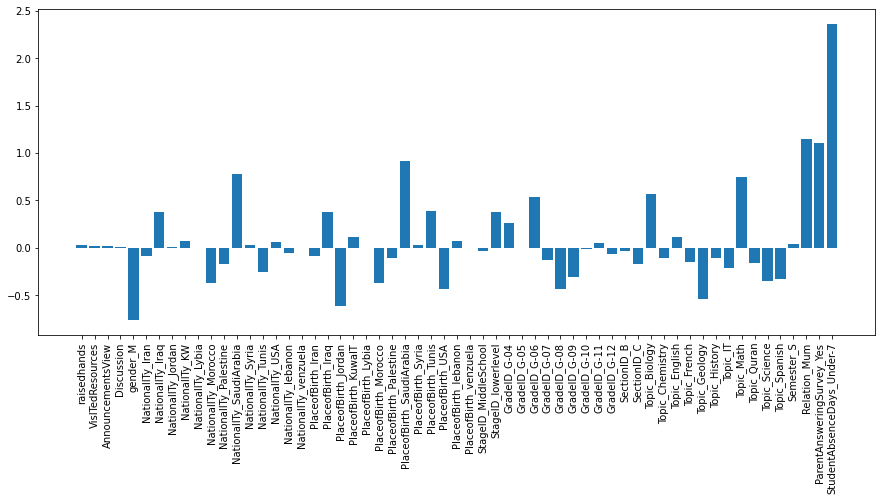

In [ ]:
fig=plt.figure(figsize=(15,6))
plt.bar(X.columns,model_lr.coef_[0,:]) #성적을 좋게 하는 요소 확인
plt.xticks(rotation=90)
plt.show()



로지스틱 회귀 결과, 성적에 영향을 미치는 가장 큰 요인은 출석날짜이다. 출석날짜가 7일 미만일수록 성적이 더 높게 나온다. 초중고 한번도 개근상 받아본 적 없는데... 내가 혹시 그래서...?...

그리고 부모님이 학교 설문조사 그런거 해주는 것처럼 학교에 관심이 많은 경우랑 책임자가 엄마일 때 성적이 높게 나온다. 

출석도 그렇고 부모님의 관심도도 그렇고, 결국은 미성년자인 아이가 성적을 잘 받기 위해서는 부모님의 관심이 가장 중요한 것 같다. 지나치면... 스카이캐슬 되지만.

그 외에 사우디아라비아인 학생들의 성적이 꽤 높게 나왔고, 자기 과목으로 수학을 고른 학생들의 성적이 높게 나왔다.


###  XGBoost 모델로 특징의 중요도 확인하기

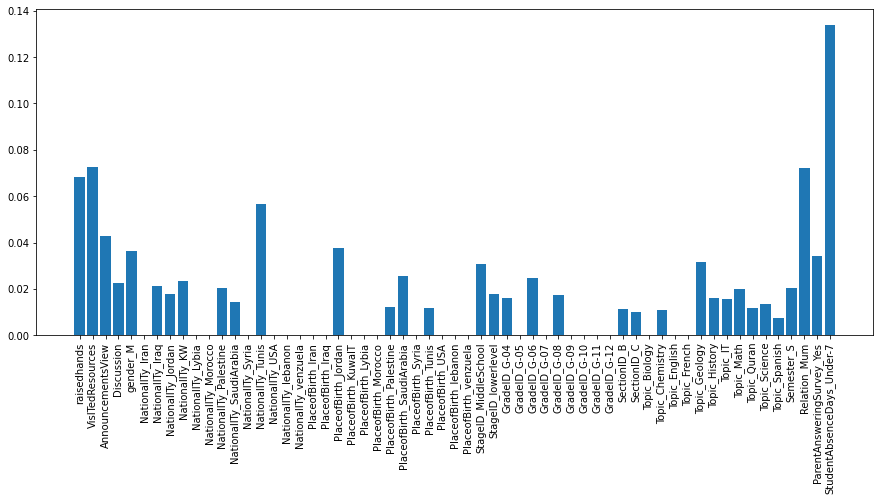

In [ ]:
fig=plt.figure(figsize=(15,6))
plt.bar(X.columns,model_xgb.feature_importances_)
plt.xticks(rotation=90)
plt.show()


xgboost 학습 결과로도 출석일수와 부모님 설문조사 응한 경우가 가장 중요한 결과라는 것을 알 수 있다.

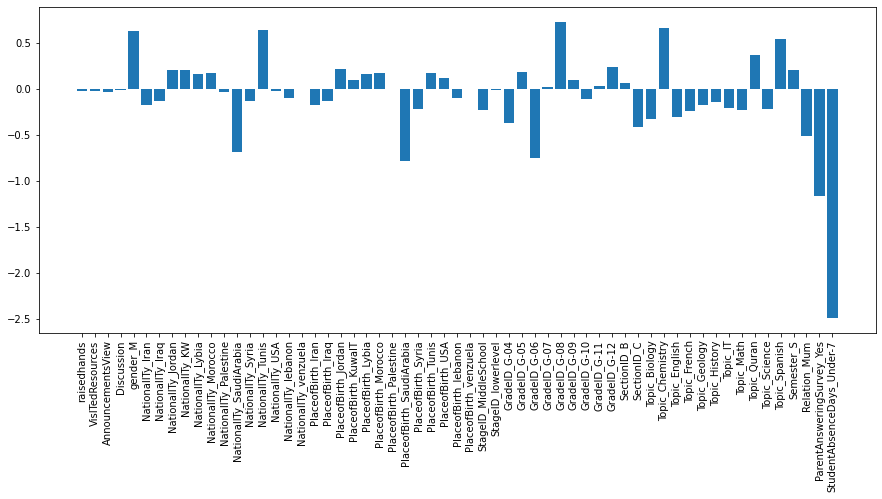

In [ ]:
fig=plt.figure(figsize=(15,6))
plt.bar(X.columns,model_lr.coef_[1,:]) # 성적을 나쁘게 만드는 요소 확인
plt.xticks(rotation=90)
plt.show()

남자인 애들, GradeID가 08인 애들, 나라가 튜니스인 애들, 영어를 공부하는 애들이 성적이 좋지 않게 나온다.